# Modelling

In [0]:
!pip install --upgrade tables
!pip install eli5

     |████████████████████████████████| 4.3MB 2.9MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4
     |████████████████████████████████| 112kB 2.8MB/s 


In [0]:
import pandas as pd
import numpy as np
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.


In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix2/dw_matrix_cars/"

/content/drive/My Drive/Colab Notebooks/dw_matrix/dw_matrix2/dw_matrix_cars


In [0]:
from eli5.sklearn import PermutationImportance

In [0]:
df = pd.read_hdf('data/car.h5')
df.shape

(106494, 155)

In [0]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

Dummy model

In [0]:
df.select_dtypes(np.number).columns

Index(['price_value', 'car_id'], dtype='object')

In [0]:
feats = ['car_id']
X = df[ feats ].values
y = df ['price_value'] .values

model = DummyRegressor()
model.fit(X,y)
y_pred = model.predict(X)

mae(y, y_pred)


39465.934630440985

In [0]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [0]:
df['price_currency'].value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [0]:
df = df[ df['price_currency'] != 'EUR']
df.shape

(106290, 155)

#Features

In [0]:
df['param_color'].factorize()[0]

array([-1, -1, -1, ..., -1, -1, -1])

In [0]:
SUFFIX_CAT = '__cat'
for feat in df.columns:
  if isinstance(df[feat][0], list): continue
  factorized_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorized_values
  else:
    df[feat + SUFFIX_CAT]= df[feat].factorize()[0]

In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x ]
cat_feats = [x for x in cat_feats if 'price' not in x ]

len(cat_feats)

151

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19566.588937368328

In [0]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X, y)

imp = PermutationImportance(m, random_state=0).fit(X, y)
eli5.show_weights(imp, feature_names = cat_feats)

Weight,Feature
0.2533 ± 0.0040,param_napęd__cat
0.2008 ± 0.0047,param_faktura-vat__cat
0.1943 ± 0.0088,param_stan__cat
0.1423 ± 0.0086,param_rok-produkcji__cat
0.0629 ± 0.0047,param_moc__cat
0.0424 ± 0.0014,feature_kamera-cofania__cat
0.0412 ± 0.0008,param_skrzynia-biegów__cat
0.0286 ± 0.0037,param_marka-pojazdu__cat
0.0191 ± 0.0022,param_pojemność-skokowa__cat
0.0163 ± 0.0005,feature_bluetooth__cat


In [0]:
def group_bar_plot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size],feat_sort='mean',top=50, subplots=True ):
  return (
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)
  ).plot(kind='bar', figsize=(15,5), subplots=subplots);

In [0]:
df['param_napęd__cat'].value_counts()

 0    65926
-1    16343
 2     8589
 4     6945
 1     6859
 3     1628
Name: param_napęd__cat, dtype: int64

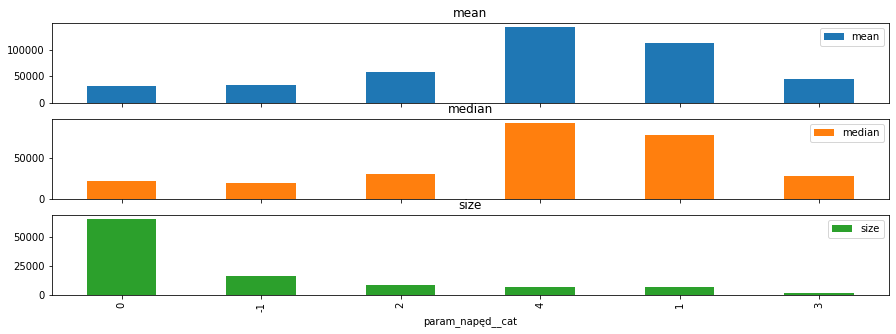

In [0]:
group_bar_plot('param_napęd__cat',feat_sort='size');

In [0]:
df['param_rok-produkcji__cat'].values

array([ 0,  1,  2, ..., 10, 20, 10])

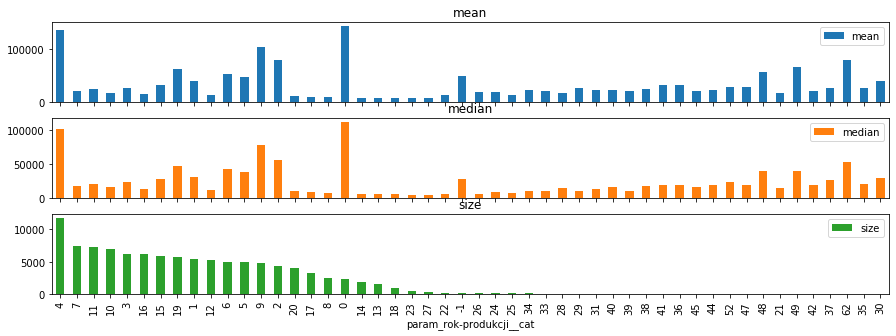

In [0]:
group_bar_plot('param_rok-produkcji__cat',feat_sort='size');

In [0]:
df.shape

(106290, 309)

In [0]:
df = df[ df['param_rok-produkcji__cat'] < 25 ]
df.shape

(104795, 309)

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-19567.5285716605

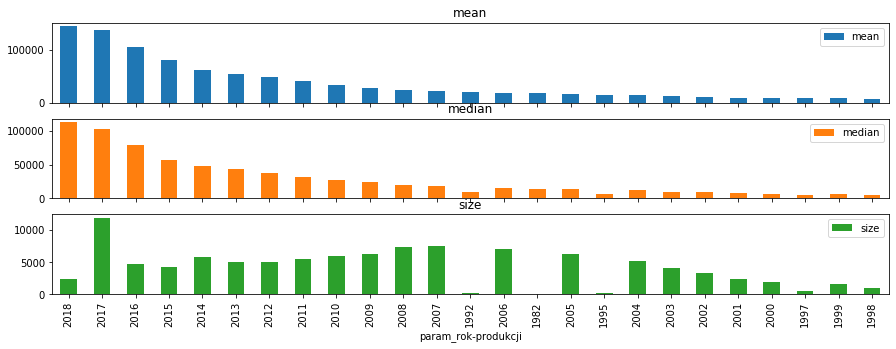

In [0]:
#group_bar_plot('param_rok-produkcji',feat_sort='size');
group_bar_plot('param_rok-produkcji',feat_sort='mean');

In [0]:
df['param_moc__cat'].value_counts()

-1      9048
 28     6348
 6      6249
 3      4333
 0      4329
        ... 
 287       1
 542       1
 222       1
 541       1
 478       1
Name: param_moc__cat, Length: 547, dtype: int64

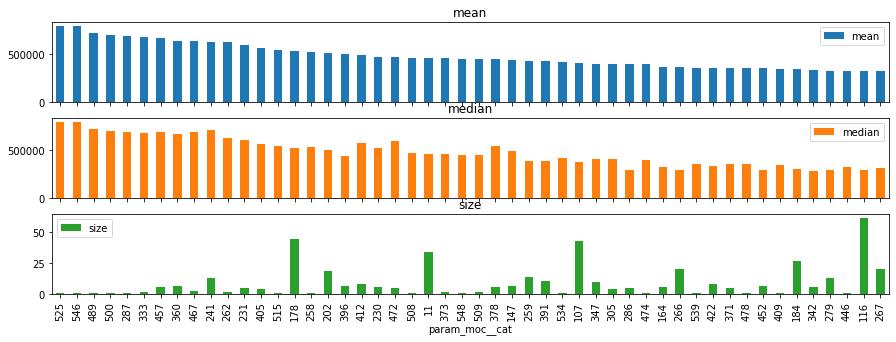

In [0]:
group_bar_plot('param_moc__cat',feat_sort='mean');